# **Proyecto Bootcamp Data Science Titanic Dataset**

# Descripción del Proyecto de Data Science

## 1.1 Resumen
Este proyecto tiene como objetivo predecir la variable objetivo `Survived`, que indica si un pasajero sobrevivió (`1`) o no sobrevivió (`0`). A continuación, se describen las características principales del conjunto de datos:

- **`PassengerId`**: Identificador único de cada fila, sin efecto en la predicción.
- **`Survived`**: Variable objetivo.  
  - **1**: Sobrevivió.  
  - **0**: No sobrevivió.  
- **`Pclass` (Clase del Pasajero)**: Representa el estatus socioeconómico, una variable categórica ordinal con tres valores únicos:  
  - **1**: Clase alta.  
  - **2**: Clase media.  
  - **3**: Clase baja.  
- **`Name`**, **`Sex`** y **`Age`**: Información descriptiva del pasajero.
- **`SibSp`**: Número total de hermanos y/o cónyuge del pasajero a bordo.
- **`Parch`**: Número total de padres y/o hijos del pasajero a bordo.
- **`Ticket`**: Número del boleto del pasajero.
- **`Fare`**: Costo del boleto del pasajero.
- **`Cabin`**: Número de cabina asignado al pasajero.
- **`Embarked`**: Puerto de embarque, una variable categórica con tres valores únicos:  
  - **C**: Cherbourg.  
  - **Q**: Queenstown.  
  - **S**: Southampton.

Este análisis se centra en explorar estas características para construir un modelo predictivo que permita clasificar correctamente la supervivencia de los pasajeros.

# **1.** Carga de las bibliotecas a utilizar para tratar nuestros datos.

In [1]:
import matplotlib.pyplot as plt  #Importamos la biblioteca Maplotlib, específicamente Pyplot para nuestras visualizaciones.
import numpy as np  #Numpy para el manejo de datos.
import pandas as pd #Pandas para el manejo de datos.
import seaborn as sns  #Seaborn para visualización de datos.
!pip install factor-analyzer   #Instalamos los complementos a utilizar más adelante mediante PIP (pip instals package)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42622 sha256=c3a455e714be6c9bbc495b9ea6977c02208c03da130e3f165675d0aa60fa13d2
  Stored in directory: /Users/nachorobles/Library/Caches/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor-analyzer


In [2]:
#Importamos el dataset que vamos a utilizar
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

#aplicamos la función head para revisar que todo esté en orden.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **2.** Establecemos las métricas para definir el baseline de nuestro trabajo utilizando

In [4]:
#Vamos a utilizar 3 modelos de clasificación de machine learning: KNN, Random Forest y Regresión Logística.

# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Separar características y variable objetivo (target)
X = titanic.drop(['Survived'], axis=1)  # 'Survived' es la variable objetivo
y = titanic['Survived']

# Identificar columnas categóricas y numéricas
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Crear un pipeline para el preprocesamiento
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores numéricos con la media
    ('scaler', StandardScaler())  # Escalar los datos numéricos
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores categóricos con el más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar categorías con OneHotEncoder, usando un ignore en caso de datos desconocidos.
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar preprocesamiento
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Modelo 1: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))

# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# Modelo 3: Regresión Logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_preds))

# Evaluación adicional: Reporte de clasificación
print("\nKNN Classification Report:\n", classification_report(y_test, knn_preds))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, log_reg_preds))

KNN Accuracy: 0.7985074626865671
Random Forest Accuracy: 0.8134328358208955
Logistic Regression Accuracy: 0.8208955223880597

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.81      0.67      0.73       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85       157
           1       0.85      0.67      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       157

In [5]:
titanic.info() #Usamos la función "info" para obtener un resumen de nuestros datos, el tipo y cantidad de "missing values".

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Tenemos principalmente 3 categorías con datos faltantes:
- 'Age'
- 'Cabin'
- 'Embarked'

Utilizaremos algunos acercamientos que detallamos en los siguientes pasos.



# **3.** Feature Engineering

Aquí realizamos 3 procesos a nuestros datos, todos basándonos en resultados y estudio de nuestro dataset:

1. Extracción de los títulos en los nombres. Esta es una información que impacta porque se asocia el título a la clase social y esta a su vez nos va a servir para obtener las edades faltantes y es un buen predictor de la supervivencia de una persona dentro del Titanic.
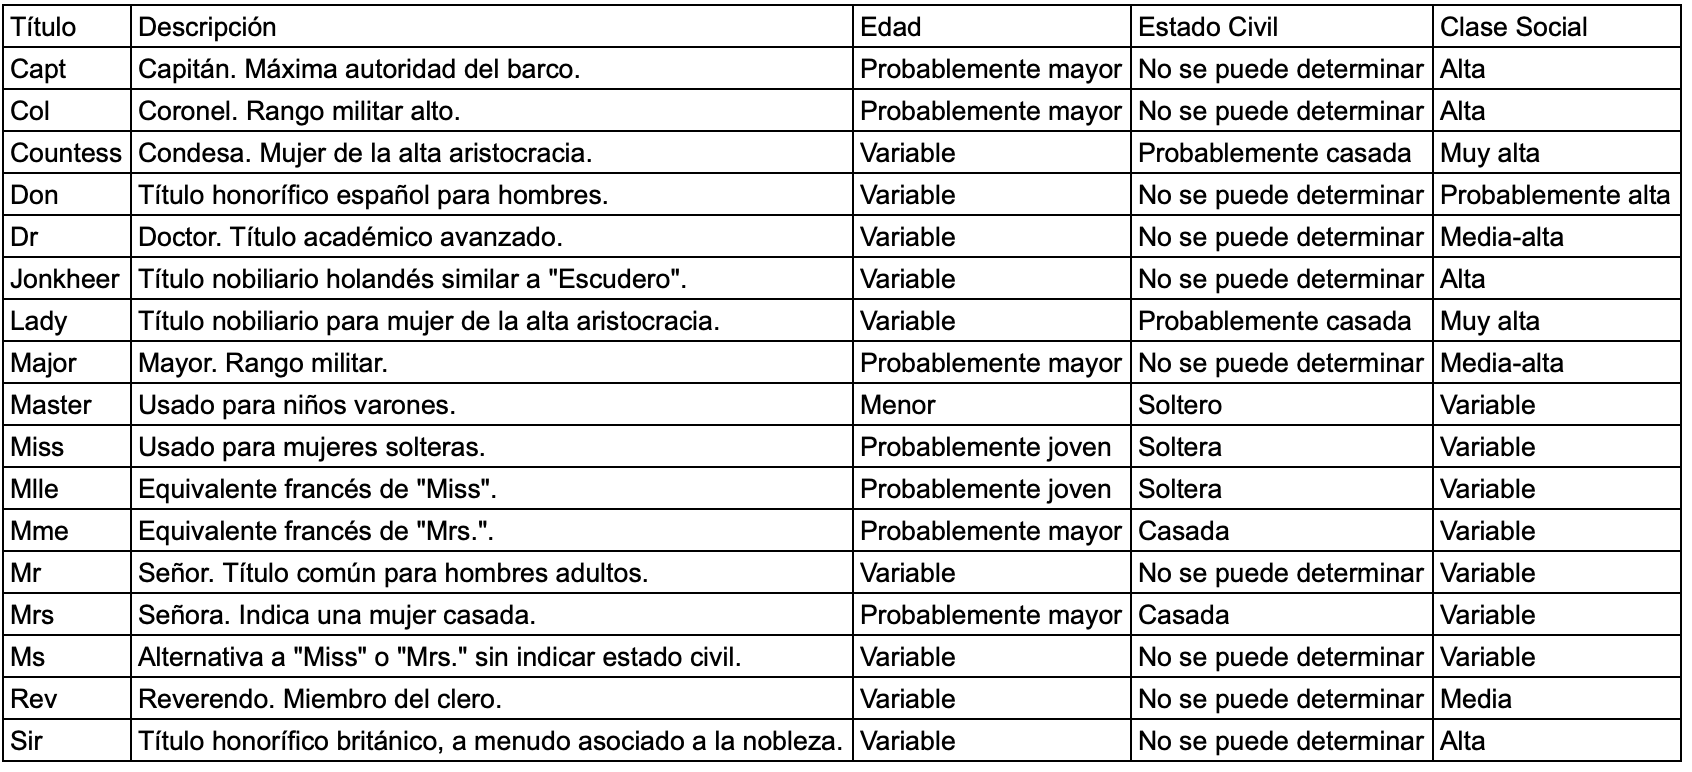



### 3.1 Extraemos el título del nombre

In [6]:
# Función para extraer el título del nombre
def extraer_titulo(nombre):
  import re
  titulo_busqueda = re.search(' ([A-Za-z]+)\.', nombre)
  if titulo_busqueda:
    return titulo_busqueda.group(1)
  return ""

# Aplicar la función a la columna "Name" para crear la nueva columna "Title"
titanic['Title'] = titanic['Name'].apply(extraer_titulo)

# Mostrar las primeras filas del DataFrame con la nueva columna "Title"
print(titanic[['Name', 'Title']].head())

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


In [7]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Define las variables predictoras
features = ['Pclass', 'Title', 'Sex']

# Crea X e y para las filas con edad conocida
X = titanic[titanic['Age'].notnull()][features]
y = titanic[titanic['Age'].notnull()]['Age']

# Codifica las variables categóricas
ohe = OneHotEncoder(handle_unknown='ignore')
X_encoded = ohe.fit_transform(X)

# Ajusta el modelo de regresión lineal
model = LinearRegression()
model.fit(X_encoded, y)

# Crea X_missing_age para las filas con edad nula
X_missing_age = titanic[titanic['Age'].isnull()][features]

# Codifica X_missing_age
X_missing_age_encoded = ohe.transform(X_missing_age)

# Predice los valores de edad faltantes
predicted_ages = model.predict(X_missing_age_encoded)

# Imputa los valores predichos
titanic.loc[titanic['Age'].isnull(), 'Age'] = predicted_ages

# Muestra las primeras 5 filas del conjunto de datos con la columna 'Age' imputada
print(titanic.head().to_markdown(index=False, numalign="left", stralign="left"))

| PassengerId   | Survived   | Pclass   | Name                                                | Sex    | Age   | SibSp   | Parch   | Ticket           | Fare    | Cabin   | Embarked   | Title   |
|:--------------|:-----------|:---------|:----------------------------------------------------|:-------|:------|:--------|:--------|:-----------------|:--------|:--------|:-----------|:--------|
| 1             | 0          | 3        | Braund, Mr. Owen Harris                             | male   | 22    | 1       | 0       | A/5 21171        | 7.25    | nan     | S          | Mr      |
| 2             | 1          | 1        | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38    | 1       | 0       | PC 17599         | 71.2833 | C85     | C          | Mrs     |
| 3             | 1          | 3        | Heikkinen, Miss. Laina                              | female | 26    | 0       | 0       | STON/O2. 3101282 | 7.925   | nan     | S          | Miss    |
| 4             | 1      


### 3.2 Extracción 'Compartments'

Extraemos las letras de los compartimientos del titanic y revisamos cuál es la tasa de supervivencia por compartimiento.

In [8]:
# Extraer las letras de la columna 'Cabin' utilizando una expresión regular
titanic['Compartments'] = titanic['Cabin'].str.extract('([A-Za-z]+)', expand=False)

# Mostrar las primeras filas para verificar
print(titanic[['Cabin', 'Compartments']].head())

# Botamos la columna 'Cabin', dado que no la usaremos.
titanic = titanic.drop(['Cabin'], axis=1)

  Cabin Compartments
0   NaN          NaN
1   C85            C
2   NaN          NaN
3  C123            C
4   NaN          NaN


In [9]:
# Separamos y creamos columnas más pequeñas de los datos obtenidos de las 'Cabin Letters' en 5 grupos, el grupo 'M' es el más grande y es el que corresponde a 3a clase.

titanic['Compartments'] = titanic['Compartments'].replace(['A', 'B', 'C'], 'ABC')
titanic['Compartments'] = titanic['Compartments'].replace(['D', 'E'], 'DE')
titanic['Compartments'] = titanic['Compartments'].replace(['F', 'G'], 'FG')
titanic['Compartments'] = titanic['Compartments'].replace(['T'], 'ABC')
titanic['Compartments'] = titanic['Compartments'].fillna('M')

titanic['Compartments'].value_counts().sum()

891

Graficamos nuestras columnas usando un histograma para revisar si hay relaciones entre las

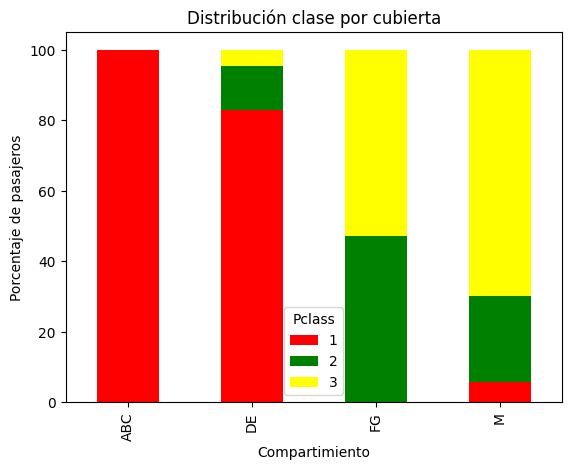

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular el porcentaje de sobrevivientes y no sobrevivientes por compartimiento (Pclass)
data = titanic.groupby(['Compartments', 'Pclass']).size().unstack(fill_value=0)
data_percentage = data.div(data.sum(axis=1), axis=0) * 100



# Crear el gráfico de barras apiladas con porcentaje
data_percentage.plot(kind='bar', stacked=True, color=['red', 'green', 'yellow'])

# Etiquetas y título
plt.xlabel('Compartimiento')
plt.ylabel('Porcentaje de pasajeros')
plt.title('Distribución clase por cubierta')

# Mostrar el gráfico
plt.show()

Cómo vemos, la cubierta "M"(usamos esa letra para describir "missing" o faltante en inglés) tiene gran representación en tercera clase, y es la clase que tuvo menos tendencia a sobrevivir.

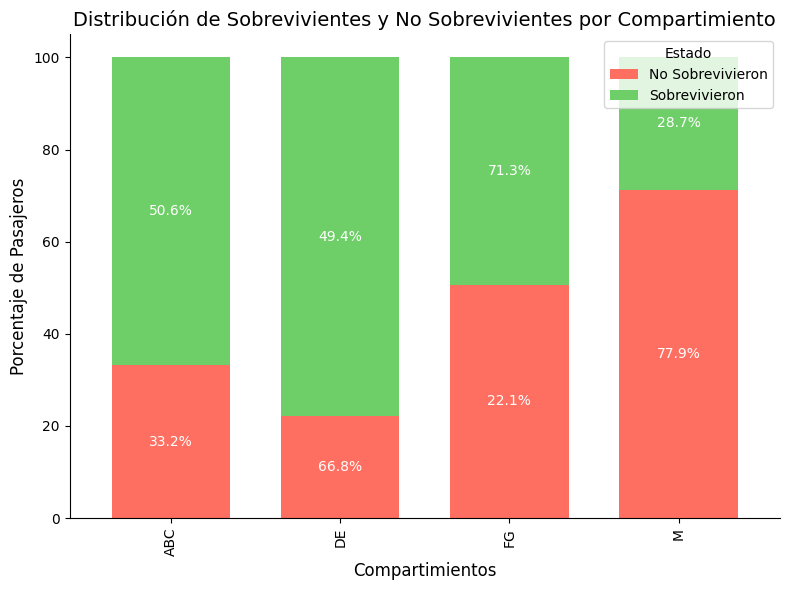

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular el porcentaje de sobrevivientes y no sobrevivientes por compartimiento
data = titanic.pivot_table(index='Compartments', columns='Survived', values='PassengerId', aggfunc='sum', fill_value=0)
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# Renombrar columnas para mayor claridad
data_percentage.columns = ['No Sobrevivieron', 'Sobrevivieron']

# Crear el gráfico de barras apiladas con Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
data_percentage.plot(kind='bar', stacked=True, color=['#FF6F61', '#6ECF68'], width=0.7, ax=ax)

# Agregar etiquetas de porcentaje dentro de cada barra
for i, rect in enumerate(ax.patches):
    # Cada barra tiene un índice único, usamos su posición para encontrar el porcentaje correspondiente
    compartment_idx = i // 2  # Dos barras por compartimiento
    survived_idx = i % 2      # 0 = No sobrevivió, 1 = Sobrevivió
    value = data_percentage.iloc[compartment_idx, survived_idx]

    # Posición para la etiqueta (ajustamos para centrar)
    x_pos = rect.get_x() + rect.get_width() / 2
    y_pos = rect.get_y() + rect.get_height() / 2

    # Agregar el texto del porcentaje
    ax.text(x_pos, y_pos, f'{value:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Personalización del gráfico
ax.set_xlabel('Compartimientos', fontsize=12)
ax.set_ylabel('Porcentaje de Pasajeros', fontsize=12)
ax.set_title('Distribución de Sobrevivientes y No Sobrevivientes por Compartimiento', fontsize=14)
ax.legend(title='Estado', fontsize=10)
sns.despine()

# Ajustar espaciado y mostrar el gráfico
plt.tight_layout()
plt.show()

Con este ejemplo gráfico podemos observar que los pasajeros que se encontraban en las cabinas con mayor presencia de 1a clase fueron las que tuvieron menores muertes, lo que parece indicar que existe una relación entre el compartimiento y la supervivencia.

In [12]:
# De la información recopilada en Kaggle, entendemos que los datos faltantes de 'Embarked' corresponden a una pasajeros que eran del valor 'S'

titanic['Embarked'] = titanic['Embarked'].fillna('S')

### 3.3 Columna 'Family'

Genero una columna unificada 'Family' uniendo 'SibSp' (siblings y spouse) y 'Parch' (parents and children) más 1, de manera de obtener la familia completa de ese pasajero a bordo. Con esto, agregamos una columna que separe personas solas de personas con familia a bordo.

In [13]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic = titanic.drop(['SibSp', 'Parch'], axis=1)
titanic['IsAlone'] = (titanic['Family'] == 1).astype(int) #Generamos una selección creando una columna nueva.

In [77]:
# Separar características y variable objetivo (target)
X = titanic.drop(['Survived'], axis=1)  # 'Survived' es la variable objetivo
y = titanic['Survived']

# Identificar columnas categóricas y numéricas
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Crear un pipeline para el preprocesamiento
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores numéricos con la media
    ('scaler', StandardScaler())  # Escalar los datos numéricos
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores categóricos con el más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar categorías con OneHotEncoder, usando un ignore en caso de datos desconocidos.
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar preprocesamiento
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Modelo 1: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))

# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# Modelo 3: Regresión Logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_preds))

# Evaluación adicional: Reporte de clasificación
print("\nKNN Classification Report:\n", classification_report(y_test, knn_preds))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, log_reg_preds))

KNN Accuracy: 0.8208955223880597
Random Forest Accuracy: 0.8208955223880597
Logistic Regression Accuracy: 0.832089552238806

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       157


Luego de aplicar el Feature engineering vemos mejoras en comparación con nuestras mediciones iniciales:

Primera medición:

- KNN Accuracy: 79.85%
- Random Forest Accuracy: 81.34%
- Logistic Regression Accuracy: 82.08%

Segunda medición:

- KNN Accuracy: 82.08%
- Random Forest Accuracy: 82.08%
- Logistic Regression Accuracy: 83.21%

Análisis comparativo:

	KNN:
	•	Mejora de +2.23% en la segunda medición.
	•	Ahora iguala al Random Forest en precisión.
	Random Forest:
	•	Mejora de +0.74% en la segunda medición.
	•	Aunque mejora, no supera a Logistic Regression.
	Logistic Regression:
	•	Mejora de +1.13% en la segunda medición.
	•	Sigue siendo el modelo más preciso.

En general, todos los modelos mejoraron, pero Logistic Regression mantiene el mejor desempeño en ambas pruebas.

# **4.** Reducción de Dimensionalidad

## 4.1 Revisamos correlaciones entre variables.

Para iniciar nuestra reducción, realizamos un análisis de correlación entre las variables para definir si corresponde aplicar y cuáles serán modificadas. El objetivo es capturar la mayor cantidad de datos sin perder información, para esto realizamos un heatmap pues resulta más fácil de analizar.

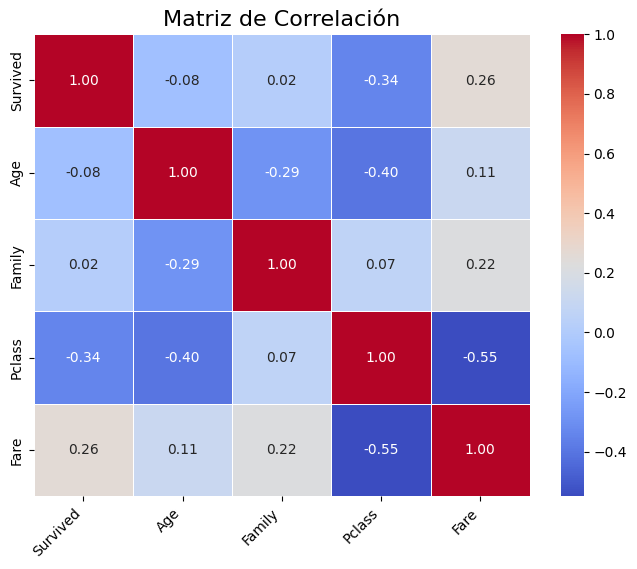

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas específicas
columns_of_interest = ['Survived', 'Age', 'Family', 'Pclass', 'Fare']
df_selected = titanic[columns_of_interest]

# Aumentar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el heatmap de correlación
sns.heatmap(
    df_selected.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Rotar las etiquetas del eje x para mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Agregar un título al heatmap
plt.title("Matriz de Correlación", fontsize=16)

# Mostrar el gráfico
plt.show()


Las variables analizadas parecen distribuirse en dos categorías que tienen relación con el parentesco y con la clase social. Es importante considerar que unificamos 'Parch' y 'SibSp' en una misma categoría 'Family', por lo que solamente nos quedaría reducir las variables que tienen relación con la clase social.

- 'Age' tiene una correlación moderada con 'Pclass'

- 'Pclass' tiene una alta correlación con 'Fare' y luego una  correlación moderada con 'Age'.  

- 'Fare' tiene una alta correlación con 'Pclass'.

En conclusión, las correlaciones entre las dos últimas categorías revisadas pueden sugerir una posible colinealidad que empeora el resultado de nuestro modelo. Por esto vamos a probar con el método PCA y crearemos una nueva categoría 'Estatus_Socioeconomico_PCA'. Vamos a correr nuestras pruebas y revisar el rendimiento de nuestro modelo.


In [16]:
# Ejemplo 2:  Usando PCA (1 componente principal)
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
titanic['Estatus_Socioeconomico_PCA'] = pca.fit_transform(titanic[['Pclass', 'Fare']])

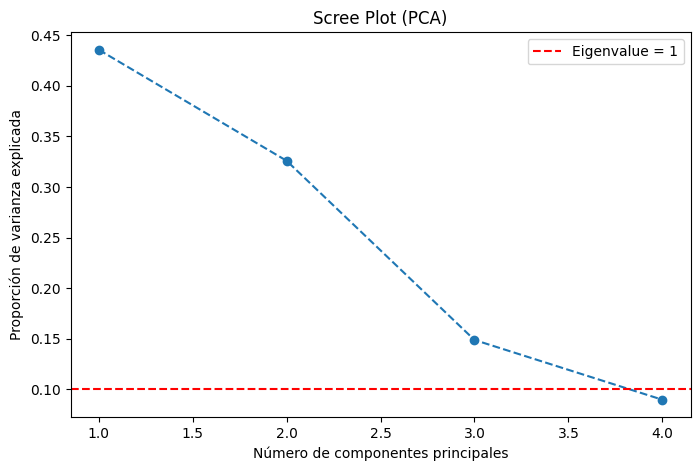

Varianza explicada acumulada:
[0.4357173  0.76163471 0.91036408 1.        ]

Cargas de los componentes principales:
             PC1       PC2       PC3       PC4
Age    -0.483461 -0.464881  0.693363  0.263439
Family  0.085102  0.754444  0.628865 -0.167635
Pclass  0.675932 -0.053176  0.163363  0.716660
Fare   -0.549673  0.460297 -0.311593  0.623616


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar las variables numéricas
variables = ['Age', 'Family', 'Pclass', 'Fare']
titanic_selected = titanic[variables]

# Escalar las variables
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_selected)

# Aplicar PCA
pca = PCA()
pca_components = pca.fit_transform(titanic_scaled)

# Proporción de varianza explicada
explained_variance = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot (PCA)')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.axhline(y=0.1, color='r', linestyle='--', label="Eigenvalue = 1")
plt.legend()
plt.show()

# Varianza acumulada
varianza_acumulada = explained_variance.cumsum()
print("Varianza explicada acumulada:")
print(varianza_acumulada)

# Cargas de los componentes principales
cargas = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(explained_variance))], index=variables)
print("\nCargas de los componentes principales:")
print(cargas)

A partir del resultado anterior, voy a realizar la extracción de una nueva variable denominada 'Estatus_Socioeconómico_PCA' que agrupe las variables Pclass y Fare. Procederemos a testear nuestros resultados con este cambio.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Suponemos que ya creaste la columna 'Estatus_Socioeconomico_PCA'
# Seleccionar las columnas necesarias
titanic = titanic[['Estatus_Socioeconomico_PCA', 'Age', 'Family', 'Pclass', 'Fare', 'Survived']].dropna()

# Crear dos conjuntos de datos
X_original = titanic[['Pclass', 'Fare', 'Age', 'Family']]  # Conjunto original
X_transformed = titanic[['Estatus_Socioeconomico_PCA', 'Age', 'Family']]  # Conjunto con PCA
y = titanic['Survived']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Definir los modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Función para entrenar y evaluar
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"Modelo: {name}")
        print(classification_report(y_test, y_pred))
    return results

# Evaluar modelos con datos originales
print("Resultados con variables originales:")
results_original = evaluate_models(X_train_orig, X_test_orig, y_train, y_test)

# Evaluar modelos con datos transformados (con Estatus_Socioeconomico_PCA)
print("\nResultados con variable PCA:")
results_pca = evaluate_models(X_train_pca, X_test_pca, y_train, y_test)

# Comparar resultados
print("\nComparación de accuracy:")
print("Variables originales:", results_original)
print("Variable PCA:", results_pca)

Resultados con variables originales:
Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       157
           1       0.75      0.45      0.56       111

    accuracy                           0.71       268
   macro avg       0.72      0.67      0.67       268
weighted avg       0.72      0.71      0.69       268

Modelo: Decision Tree
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       157
           1       0.55      0.47      0.51       111

    accuracy                           0.62       268
   macro avg       0.61      0.60      0.60       268
weighted avg       0.62      0.62      0.62       268

Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       157
           1       0.65      0.55      0.60       111

    accuracy                           0.69       268
   macro avg       

## **4.2** **Resumen de Conclusiones**

### **Comparación de Accuracy**
| Modelo                  | Accuracy (Variables Originales) | Accuracy (Variable PCA) |
|-------------------------|----------------------------------|--------------------------|
| Logistic Regression     | **0.709**                      | 0.660                   |
| Decision Tree           | 0.642                          | 0.642                   |
| Random Forest           | **0.709**                      | 0.687                   |

---

### **Conclusiones Clave**
1. **Logistic Regression:**
   - Las **variables originales** (`Pclass` y `Fare`) obtuvieron un mejor desempeño (0.709) que la **variable PCA** (0.660).
   - La transformación PCA puede haber perdido información importante.

2. **Decision Tree:**
   - No hubo diferencia en el desempeño (0.642) entre ambos enfoques, indicando que el árbol de decisión no se beneficia particularmente de la correlación entre `Pclass` y `Fare`.

3. **Random Forest:**
   - Las **variables originales** tuvieron un desempeño ligeramente mejor (0.709) frente a la **variable PCA** (0.687), pero la diferencia no es significativa.

4. **Impacto del PCA:**
   - El PCA no mejoró significativamente el desempeño de los modelos y, en algunos casos, resultó en una ligera pérdida de accuracy.

---

### **Pasos a Seguir**
1. **Mantener las variables originales:**
   - Trabajaremos con `Pclass` y `Fare` por separado es más efectivo para maximizar el desempeño del modelo.

2. **Uso de PCA:**
   - Si la simplicidad del modelo o la reducción de dimensionalidad son prioridades, `Estatus_Socioeconomico_PCA` sigue siendo una alternativa válida con un desempeño aceptable pero no seguiremos con esta variable.

3. **Pruebas adicionales:**
   - Ajustar hiperparámetros o realizar validación cruzada podría ofrecer más información sobre el impacto del PCA en el desempeño de los modelos. Esto lo realizaremos al final del trabajo.

# **5.** Aplicamos manejo de Outliers

### **5.1** Visualización Outliers

Usamos boxplots para visualizar los valores atípicos y luego los removemos identificando el rango intercuartílico de los datos.

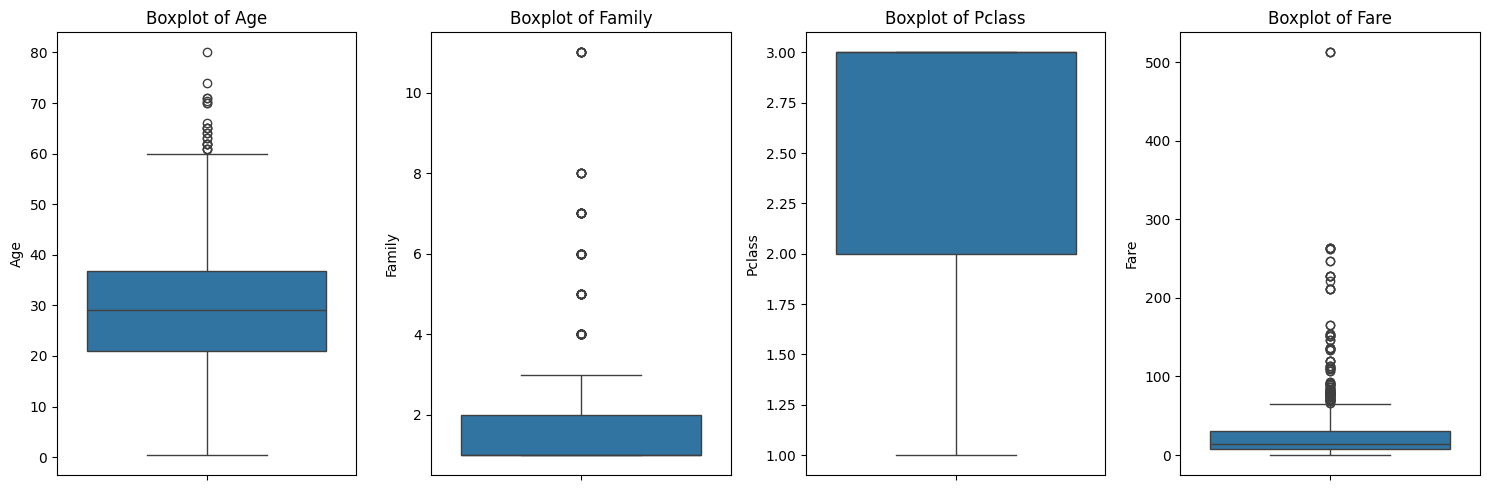

In [19]:

# Visualización con Boxplots

plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Family', 'Pclass', 'Fare'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=titanic[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()



In [20]:
#Eliminamos los valores atípicos presentes en las columnas 'Age', 'Fare' y 'Family'.

import pandas as pd

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Removemos los valores de las columnas
df_no_outliers = remove_outliers_iqr(titanic, 'Age')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'Family')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'Pclass')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'Fare')

# hacemos un print del nuevo dataset
print(df_no_outliers.head())

   Estatus_Socioeconomico_PCA        Age  Family  Pclass     Fare  Survived
0                  -24.959534  22.000000       2       3   7.2500         0
2                  -24.284563  26.000000       1       3   7.9250         1
3                   20.906999  35.000000       2       1  53.1000         1
4                  -24.159568  35.000000       1       3   8.0500         0
5                  -23.751285  29.032887       1       3   8.4583         0


### **5.2** Isolation Forest

Utilizamos IsolationForest para realizar el manejo de outliers según lo revisado en clases.

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Crear una copia del dataset para análisis de outliers
titanic_test = titanic.copy()

# Seleccionar variables numéricas para Isolation Forest
df_num = titanic_test.select_dtypes(include=[np.number]).drop(columns=['Survived'])  # Excluye la variable objetivo

# Aplicar Isolation Forest para detectar outliers
iso_forest = IsolationForest(contamination=0.1, random_state=42)
titanic_test['outlier'] = iso_forest.fit_predict(df_num)

# Crear datasets separados
with_outliers = titanic_test.drop(columns=['outlier'])  # Dataset original con outliers
without_outliers = titanic_test[titanic_test['outlier'] == 1].drop(columns=['outlier'])  # Sin outliers
only_outliers = titanic_test[titanic_test['outlier'] == -1].drop(columns=['outlier'])  # Solo outliers

# Función para entrenar y evaluar modelos
def train_and_evaluate(df, label="Con Outliers"):
    X = df.drop(columns=['Survived'])
    y = df['Survived']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalado de datos
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Modelos a entrenar
    models = {
        "Random Forest": RandomForestClassifier(max_depth=5, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Regresión Logística": LogisticRegression(max_iter=200)
    }

    # Evaluación de modelos
    print(f"\nResultados para dataset: {label}")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name}: Accuracy = {accuracy:.4f}")

# Comparar modelos con y sin outliers
train_and_evaluate(with_outliers, "Con Outliers")
train_and_evaluate(without_outliers, "Sin Outliers")
train_and_evaluate(only_outliers, "Solo Outliers")  # Opcional: evaluar solo los outliers


Resultados para dataset: Con Outliers
Random Forest: Accuracy = 0.7598
KNN: Accuracy = 0.7374
Regresión Logística: Accuracy = 0.7374

Resultados para dataset: Sin Outliers
Random Forest: Accuracy = 0.7702
KNN: Accuracy = 0.7329
Regresión Logística: Accuracy = 0.7329

Resultados para dataset: Solo Outliers
Random Forest: Accuracy = 0.9444
KNN: Accuracy = 0.8889
Regresión Logística: Accuracy = 0.7778


## **5.3** Conclusiones del Manejo de Outliers

En las pruebas vemos que los modelos sufren pérdida de desempeño sin los outliers, por lo que mantenemos los datos originales sin este tratamiento.

# **6.** Ajustes de Hiperparámetros.

Utilizamos método "GridSearch" revisado en clases

In [23]:
# Cargamos datos en variables X e y
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

# Dividir en entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Identificar columnas categóricas y numéricas
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [24]:
params_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [4, 5, 6, 7, 8],  # Profundidad máxima del árbol
    'min_child_weight': [1, 3, 5, 10],  # Peso mínimo en los nodos hoja
    'gamma': [0, 0.5, 1, 1.5, 2, 5],  # Reducción mínima de pérdida para hacer un split
    'subsample': [0.5, 0.6, 0.8, 1.0],  # Fracción de muestras usadas en cada árbol
    'colsample_bytree': [0.5, 0.6, 0.8, 1.0],  # Fracción de características usadas en cada árbol
    'colsample_bylevel': [0.5, 0.7, 1.0],  # Fracción de características en cada nivel del árbol
    'reg_alpha': [0, 0.01, 0.1, 1, 10],  # Regularización L1 (Lasso)
    'reg_lambda': [0, 0.01, 0.1, 1, 10],  # Regularización L2 (Ridge)
    'objective': ['binary:logistic'],  # Función de pérdida para clasificación binaria
    'eval_metric': ['logloss', 'auc'],  # Métricas de evaluación
    'random_state': [42]  # Semilla para reproducibilidad
}

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir modelos
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# Definir los grids de hiperparámetros
param_grids = {
    "KNN": {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10]}
}

# Ejecutar GridSearchCV y evaluar cada modelo
best_models = {}
for name, model in models.items():
    print(f"Ejecutando GridSearchCV para {name}...")
    grid_cv = GridSearchCV(model, param_grids[name], scoring="accuracy", n_jobs=-1, cv=3, verbose=1)
    grid_cv.fit(X_train, y_train)

    best_models[name] = grid_cv.best_estimator_
    print(f"\n{name} Mejores Parámetros: {grid_cv.best_params_}")
    print(f"{name} Mejor CV Score: {grid_cv.best_score_}")
    print(f"{name} Accuracy en test: {round(accuracy_score(y_test, best_models[name].predict(X_test)), 5)}")
    print(f"\n{name} Classification Report:\n", classification_report(y_test, best_models[name].predict(X_test)))


Ejecutando GridSearchCV para KNN...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

KNN Mejores Parámetros: {'n_neighbors': 9, 'weights': 'uniform'}
KNN Mejor CV Score: 0.7110739502043849
KNN Accuracy en test: 0.63433

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70       165
           1       0.52      0.51      0.52       103

    accuracy                           0.63       268
   macro avg       0.61      0.61      0.61       268
weighted avg       0.63      0.63      0.63       268

Ejecutando GridSearchCV para Random Forest...
Fitting 3 folds for each of 9 candidates, totalling 27 fits

Random Forest Mejores Parámetros: {'max_depth': 10, 'n_estimators': 200}
Random Forest Mejor CV Score: 0.7335485569181222
Random Forest Accuracy en test: 0.67537

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       